# Import and Preprocess NBA Data

- Import advanced individual statistics from all NBA teams from 2009-2019
- Import advanced team statistics for the 2018-2019 season

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
player_stats = pd.ExcelFile('NBA_AdvancedStatsNew.xlsx')
print(player_stats.sheet_names)
playoff_teams = pd.ExcelFile('NBA_PlayoffTeams.xlsx')

['09_10', '10_11', '11_12', '12_13', '13_14', '14_15', '15_16', '16_17', '17_18', '18_19']


In [3]:
# Isolate data from each season and label with that season's year.
# Combine this back into a dataframe

df_09_10 = pd.read_excel(player_stats, '09_10') 
year = ['09_10']*df_09_10.shape[0]
df_09_10['Year'] = year

df_10_11 = pd.read_excel(player_stats, '10_11')
year = ['10_11']*df_10_11.shape[0]
df_10_11['Year'] = year

df_11_12 = pd.read_excel(player_stats, '11_12')
year = ['11_12']*df_11_12.shape[0]
df_11_12['Year'] = year

df_12_13 = pd.read_excel(player_stats, '12_13')
year = ['12_13']*df_12_13.shape[0]
df_12_13['Year'] = year

df_13_14 = pd.read_excel(player_stats, '13_14')
year = ['13_14']*df_13_14.shape[0]
df_13_14['Year'] = year

df_14_15 = pd.read_excel(player_stats, '14_15')
year = ['14_15']*df_14_15.shape[0]
df_14_15['Year'] = year

df_15_16 = pd.read_excel(player_stats, '15_16')
year = ['15_16']*df_15_16.shape[0]
df_15_16['Year'] = year

df_16_17 = pd.read_excel(player_stats, '16_17')
year = ['16_17']*df_16_17.shape[0]
df_16_17['Year'] = year

df_17_18 = pd.read_excel(player_stats, '17_18')
year = ['17_18']*df_17_18.shape[0]
df_17_18['Year'] = year

df_18_19 = pd.read_excel(player_stats, '18_19')
year = ['18_19']*df_18_19.shape[0]
df_18_19['Year'] = year

df_playoff = pd.read_excel(playoff_teams) # table indicating if team made playoffs in year (column), 1 means made playoffs
#df_playoff.head(5)
df_18_19.head(5)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,588,6.3,0.507,0.809,...,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,18_19
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,123,2.9,0.379,0.833,...,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,18_19
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,428,7.6,0.474,0.673,...,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,18_19
3,4,Steven Adams\adamsst01,C,25,OKC,80,2669,18.5,0.591,0.002,...,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,18_19
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,...,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,18_19


In [4]:
# Classes for each season, 1 if team made playoffs, 0 otherwise

teams = df_playoff["Team"]
playoffs_09_10 = df_playoff["09_10"]
playoffs_10_11 = df_playoff["10_11"]
playoffs_11_12 = df_playoff["11_12"]
playoffs_12_13 = df_playoff["12_13"]
playoffs_13_14 = df_playoff["13_14"]
playoffs_14_15 = df_playoff["14_15"]
playoffs_15_16 = df_playoff["15_16"]
playoffs_16_17 = df_playoff["16_17"]
playoffs_17_18 = df_playoff["17_18"]
playoffs_18_19 = df_playoff["18_19"]

In [5]:
numTeams = 30
years = player_stats.sheet_names
numYears = len(years)

In [6]:
# Create single dataframe containing all data
# Teams represent each row arranged alphabetically, each column is years ordered chronologically

data_classes = df_playoff.iloc[:,1:].values 
frames = [df_09_10,df_10_11,df_11_12,df_12_13,df_13_14,df_14_15,df_15_16,df_16_17,df_17_18,df_18_19]
data_players = pd.concat(frames)

print(data_players.shape)
print(data_players.head(5))

(5512, 28)
   Rk                       Player Pos  Age   Tm   G    MP   PER    TS%  \
0   1      Arron Afflalo\afflaar01  SG   24  DEN  82  2221  10.9  0.576   
1   2      Alexis Ajinça\ajincal01   C   21  CHA   6    30   6.3  0.479   
2   3  LaMarcus Aldridge\aldrila01  PF   24  POR  78  2922  18.2  0.535   
3   4      Joe Alexander\alexajo01  SF   23  CHI   8    29   2.8  0.273   
4   5        Malik Allen\allenma01  PF   31  DEN  51   456   5.9  0.431   

    3PAr  ...  USG%  OWS  DWS   WS  WS/48  OBPM  DBPM   BPM  VORP   Year  
0  0.426  ...  14.0  2.8  1.4  4.3  0.092   0.8  -0.5   0.3   1.3  09_10  
1  0.000  ...  19.3 -0.1  0.0  0.0 -0.013  -8.5  -2.0 -10.4  -0.1  09_10  
2  0.014  ...  22.9  5.5  3.3  8.8  0.145   0.9   0.6   1.6   2.6  09_10  
3  0.167  ...  11.3  0.0  0.0  0.0  0.030  -5.2   1.5  -3.7   0.0  09_10  
4  0.052  ...  14.0 -0.3  0.3  0.1  0.009  -4.2  -0.8  -5.0  -0.3  09_10  

[5 rows x 28 columns]


In [7]:
# Create a VORP matrix which contains highest VORP per team organized per year.
# Reshape such that column is a data vector of interest, each column corresponds to a team (left to right)


VORP = np.zeros((10,10,numTeams))

for year in range(len(years)):
    
    index = (data_players.Year == years[year]) 
    df_year = data_players.loc[index,:]
    teams = sorted(df_year.Tm.unique())
    
    for i in range(0,30):
        
        index_team = (df_year.Tm == teams[i]) 
        df_team = df_year.loc[index_team,:]
        df_sorted = df_team.sort_values(by=['VORP'],ascending = False)
        VORP[year,:,i] = df_sorted.iloc[0:10,26] 

In [8]:
# Create labels to test data with. Based on playoff appearance

classes_1d = np.reshape(data_classes.T,(-1,1))
classes_1d = np.squeeze(classes_1d)
VORP_2d = VORP[0,:,:]

for i in arange(1,len(years)):
    temp = VORP[i,:,:]
    VORP_2d = np.hstack((VORP_2d,temp))
    
VORP_2d = VORP_2d.T

print(shape(classes_1d))
print(shape(VORP_2d))

(300,)
(300, 10)


# Data Visualization

- Use VOPR matrix to compare the talent of the top players on each team
- Determine similarity between a teams superstar players

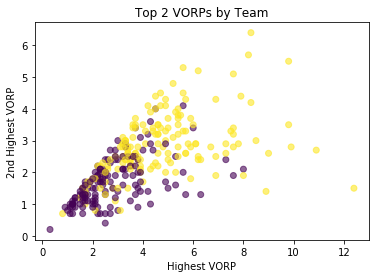

In [9]:
# Plot the two highest VORPs against each other per team

figure()
plt.scatter(VORP_2d[:,0],VORP_2d[:,1], c = classes_1d, alpha = 0.6)
plt.xlabel('Highest VORP')
plt.ylabel('2nd Highest VORP')
plt.title('Top 2 VORPs by Team')
plt.show()

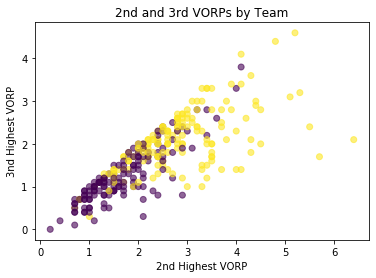

In [10]:
# Plot second and third highest VORPs against each other per team

figure()
plt.scatter(VORP_2d[:,1],VORP_2d[:,2], c = classes_1d, alpha = 0.6)
plt.xlabel('2nd Highest VORP')
plt.ylabel('3nd Highest VORP')
plt.title('2nd and 3rd VORPs by Team')
plt.show()

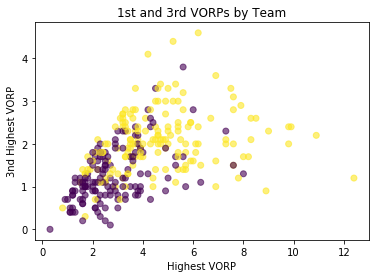

In [11]:
# Plot first and third highest VORPs against each other per team

figure()
plt.scatter(VORP_2d[:,0],VORP_2d[:,2], c = classes_1d, alpha = 0.6)
plt.xlabel('Highest VORP')
plt.ylabel('3nd Highest VORP')
plt.title('1st and 3rd VORPs by Team')
plt.show()

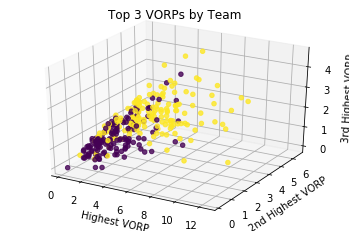

In [12]:
# Plot three highest VORPs against each other per team

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(VORP_2d[:,0],VORP_2d[:,1],VORP_2d[:,2], c = classes_1d, alpha = 0.8)
ax.set_xlabel('Highest VORP')
ax.set_ylabel('2nd Highest VORP')
ax.set_zlabel('3rd Highest VORP')
ax.set_title('Top 3 VORPs by Team')
plt.show()

# Regression

- Use polynomial regression to best fit VORP trends across players in the 2018-2019 season

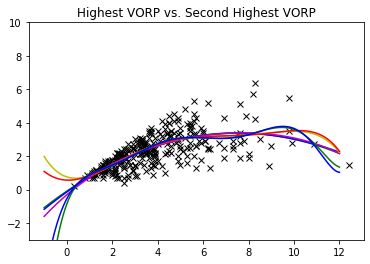

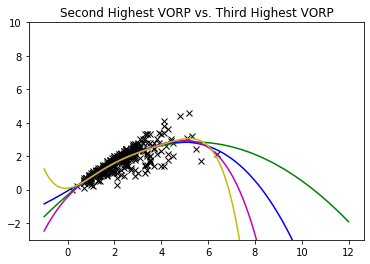

In [13]:
# Create poly function which sets up matrix based on polynomial size

def poly(x,n):
    X = np.zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X


# Manually display polynomial regression lines for an array of n values. Display for "top two highest VORPs"
# and "second and third highest VORPs".

x = VORP_2d[:,0]
y = VORP_2d[:,1]

x1 = VORP_2d[:,1]
y1 = VORP_2d[:,2]

plt.figure()
plot(x,y,'kx'); ylim(-3,10);

xx = np.linspace(-1,12,500)
color = 'yrgbm' * 5 
plt.title('Highest VORP vs. Second Highest VORP')
for n in range(2,9):
    X = poly(x,n) 
    bHat = linalg.pinv(X).dot(y)
    yy = poly(xx,n).dot(bHat) 
    plot(xx,yy,'-',c=color[n]);     
    
plt.figure()
plot(x1,y1,'kx'); ylim(-3,10);
xx = np.linspace(-1,12,500)
color = 'yrgbm' * 5 
plt.title('Second Highest VORP vs. Third Highest VORP')
for n in range(2,6):
    X = poly(x1,n) # design matrix for fitting
    bHat = linalg.pinv(X).dot(y1)
    yy = poly(xx,n).dot(bHat) # prediction
    plot(xx,yy,'-',c=color[n]);  

In [14]:
# Calculate win percentage and add to the dataframe

team_stats = pd.ExcelFile('2018 Win Percentage.xlsx')
df_team_stats = pd.read_excel(team_stats)
print(df_team_stats.head(5))
print(df_team_stats.shape)

  Unnamed: 0 Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4
0         Rk       Team    Overall         NaN      Win %
1          1        MIL         60        22.0   0.731707
2          2        TOR         58        24.0   0.707317
3          3        GSW         57        25.0   0.695122
4          4        DEN         54        28.0   0.658537
(31, 5)


In [15]:
Win_P = []
for index, rowA in df_18_19.iterrows():
    for index, rowB in df_team_stats.iterrows():
        if rowA[4] == rowB[1]:
            Win_P.append(rowB[4])
print(shape(Win_P))
print(shape(df_18_19))

(622,)
(622, 28)


In [16]:
df_18_19['Win_Percentage'] = Win_P

In [17]:
# Create new dataframe with 18-19 stats and updated win percentages.

VORP = np.zeros((10,numTeams))
index = (df_18_19.Year == years[year]) 
df_year = df_18_19.loc[index,:]
teams = sorted(df_18_19.Tm.unique())
print(teams)

for i in range(0,30):
    index_team = (df_year.Tm == teams[i]) 
    df_team = df_year.loc[index_team,:]
    df_sorted = df_team.sort_values(by=['VORP'],ascending = False)
    VORP[:,i] = df_sorted.iloc[0:10,26] # each column is a data vector of interest, each column corresponds to a team (left to right)


['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [18]:
VORP = VORP.T
print(shape(VORP))

(30, 10)


In [19]:
df_year.head(5)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Win_Percentage
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,588,6.3,0.507,0.809,...,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,18_19,0.597561
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,123,2.9,0.379,0.833,...,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,18_19,0.231707
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,428,7.6,0.474,0.673,...,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,18_19,0.353659
3,4,Steven Adams\adamsst01,C,25,OKC,80,2669,18.5,0.591,0.002,...,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,18_19,0.597561
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,...,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,18_19,0.475610


In [20]:
win_percentage = np.zeros((10,numTeams))
index = (df_18_19.Year == years[year]) 
df_year = df_18_19.loc[index,:]
teams = sorted(df_18_19.Tm.unique())
print(teams)

for i in range(0,30):
    index_team = (df_year.Tm == teams[i]) 
    df_team = df_year.loc[index_team,:]
    df_sorted = df_team.sort_values(by=['Win_Percentage'],ascending = False)
    win_percentage[:,i] = df_sorted.iloc[0:10,28] # each column is a data vector of interest, each column corresponds to a team (left to right)

['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


In [21]:
win_percentage = win_percentage.T
print(shape(win_percentage))

(30, 10)


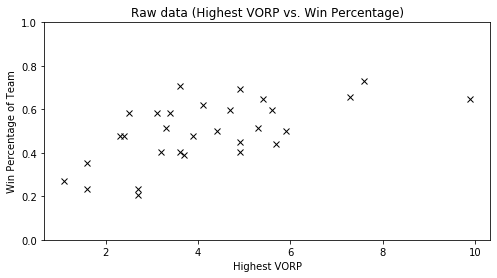

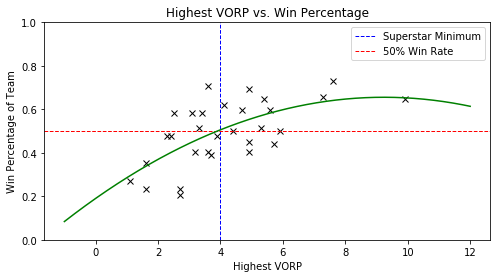

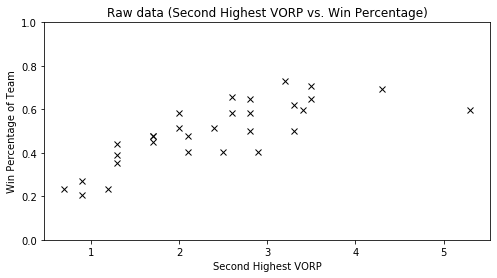

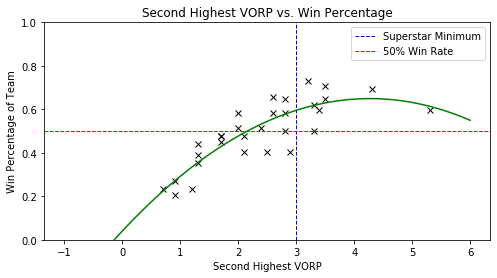

In [22]:
# Reuse polynomial regression function on 18-19 season using the best metrics

def poly(x,n):
    X = np.zeros((x.size,n+1));
    for i in range(X.shape[1]):
        X[:,i] = x**i
    return X

x = VORP[:,0]
y = win_percentage[:,0]

x1 = VORP[:,1]
y1 = win_percentage[:,1]
# c = classes_1d

y[28] = 0.5
y1[28] = 0.5

plt.figure(figsize = (8,4))
plot(x,y,'kx'); ylim(0,1);
plt.title('Raw data (Highest VORP vs. Win Percentage)')
plt.xlabel('Highest VORP')
plt.ylabel('Win Percentage of Team')

plt.figure(figsize = (8,4))
plot(x,y,'kx'); ylim(0,1);
xx = np.linspace(-1,12,500) # grid on x
color = 'yrgbm' * 5 # color sequence
plt.title('Highest VORP vs. Win Percentage')
plt.xlabel('Highest VORP')
plt.ylabel('Win Percentage of Team')
plt.axvline(x=4, c='b', linestyle='--', linewidth=1, label='Superstar Minimum')
plt.axhline(y=0.5, c='r', linestyle='--', linewidth=1, label='50% Win Rate')
plt.legend(loc=0)
for n in range(2,3):
    X = poly(x,n) # design matrix for fitting
    bHat = linalg.pinv(X).dot(y)
    yy = poly(xx,n).dot(bHat) # prediction
    plot(xx,yy,'-',c=color[n]);  
    
plt.figure(figsize = (8,4))
plot(x1,y1,'kx'); ylim(0,1);
plt.title('Raw data (Second Highest VORP vs. Win Percentage)')
plt.xlabel('Second Highest VORP')
plt.ylabel('Win Percentage of Team')
    
plt.figure(figsize = (8,4))
plot(x1,y1,'kx'); ylim(0,1);
xx = np.linspace(-1,6,500) # grid on x
color = 'yrgbm' * 5 # color sequence
plt.title('Second Highest VORP vs. Win Percentage')
plt.xlabel('Second Highest VORP')
plt.ylabel('Win Percentage of Team')
plt.axvline(x=3, c='b', linestyle='--', linewidth=1, label='Superstar Minimum')
plt.axhline(y=0.5, c='r', linestyle='--', linewidth=1, label='50% Win Rate')
plt.legend(loc=0)
for n in range(2,3):
    X = poly(x1,n) # design matrix for fitting
    bHat = linalg.pinv(X).dot(y1)
    yy = poly(xx,n).dot(bHat) # prediction
    plot(xx,yy,'-',c=color[n]);  

0.45833756719029634


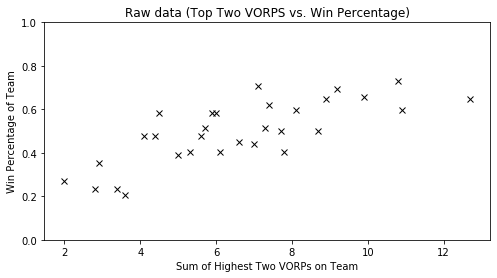

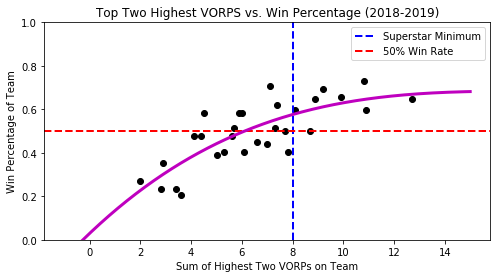

In [23]:
# Add top two VORPS together to get most accurate predictor of team playoff changes

x2 = x + x1

plt.figure(figsize = (8,4))
plot(x2,y,'kx'); ylim(0,1);
plt.title('Raw data (Top Two VORPS vs. Win Percentage)')
plt.xlabel('Sum of Highest Two VORPs on Team')
plt.ylabel('Win Percentage of Team')
    
plt.figure(figsize = (8,4))
plot(x2,y,'ok',); ylim(0,1);
xx = np.linspace(-1,15,500) # grid on x
color = 'yrgmm' * 5 # color sequence
plt.title('Top Two Highest VORPS vs. Win Percentage (2018-2019)')
plt.xlabel('Sum of Highest Two VORPs on Team')
plt.ylabel('Win Percentage of Team')
plt.axvline(x=8, c='b', linestyle='--', linewidth=2, label='Superstar Minimum')
plt.axhline(y=0.5, c='r', linestyle='--', linewidth=2, label='50% Win Rate')
plt.legend(loc=0)
for n in range(3,4):
    X = poly(x2,n) # design matrix for fitting
    bHat = linalg.pinv(X).dot(y1)
    yy = poly(xx,n).dot(bHat) # prediction
    print(sum(yy)/yy.size)
    plot(xx,yy,'-',c=color[n],linewidth=3.0);  